In [1]:
#Load packages
install.packages("hoopR")
install.packages("moderndive")
library(hoopR)
library(moderndive)
library(tidyverse)

Installing package into ‘/home/jupyter/R/x86_64-pc-linux-gnu-library/4.2’
(as ‘lib’ is unspecified)

Installing package into ‘/home/jupyter/R/x86_64-pc-linux-gnu-library/4.2’
(as ‘lib’ is unspecified)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.0     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.1     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


# Introduction
Project By: James Donham, Jack Siemens, Leo Wang, Tiansui Wu

There is the common phrase in sports "home team advantage", but is this advantage statistically significant? In this project we will attempt to answer this question with hypothesis testing over a sample of NBA basketball games. 

## Background Information

In the NBA, there has always been a notion that teams at their home court play better and have a higher chance of winning. Speculation suggests that some possible causes of why teams play better at home include the positive cheering of the crowd, referee bias for the home team, and a placebo effect on the players who simply play better because they believe that playing at home gives them an advantage. It has been shown that between 1998 and 2008, the home team has a win percentage of 60.6% in the regular season and 64.9% in the playoffs (Belhumeur, 2017). 

During the NBA playoffs, the top 8 teams in each conference, ranked by win percentage, get to compete in the playoffs for a chance a the coveted NBA Championship. The playoffs are played in best out of seven series. The team with higher seeding in the regular season gets "home court advantage" for each series, meaning that 4 out of the seven games will be played at the higher seed's home court (Green, 2023). Throughout the NBA regular season, 30 teams battle in 82 games each to compete for playoff spots and and higher seeding for home court advantage in their playoff series' to gain as much advantage as possible. Without the incentive of home court advantage, games would likely be much less competitive between the top teams in the league who are already guaranteed playoff spots, making some of the best matchups during the regular season less entertaining for the fans. 
### Inferential Research Question

We are studying the population of all NBA basketball games. The data we are using will be from a package called hoopR. This package has numerous data over a wide range of NBA games. We are selecting a sample from a population of games from 2009 to 2022, the most recent data the package has.

Our point estimate is a sample mean of a statistic we will call home margin, which is the difference in score between the team playing at home versus the team playing away from home. We then take a sample and calculate our point estimate as the mean of this home margin.

### Hypothesis

We will assume a null hypothesis of neither team having an advantage (H0: x_bar = 0), with an alternative hypothesis that being the home team does have an advatage (HA: x_bar > 0), where x is our test statistic. 

# Preliminary Results

The following is the code to compute the home team advantage mean statistic, which is our initial estimate. We will also visualize our sample distribution. 

In [2]:
# Establishing Years 2009 - 2022
years = c(2009:2022)

#load full schedule
seasons <- load_nba_schedule(seasons = years)
head(seasons)

id,uid,date,attendance,time_valid,neutral_site,conference_competition,recent,start_date,notes_type,⋯,game_id,season,season_type,PBP,team_box,player_box,game_date_time,game_date,home_venue_id,away_venue_id
<int>,<chr>,<chr>,<int>,<lgl>,<lgl>,<lgl>,<lgl>,<chr>,<chr>,⋯,<int>,<int>,<int>,<lgl>,<lgl>,<lgl>,<dttm>,<date>,<int>,<int>
290614019,s:40~l:46~e:290614019~c:290614019,2009-06-15T00:00Z,0,TRUE,FALSE,FALSE,FALSE,2009-06-15T00:00Z,event,⋯,290614019,2009,3,TRUE,TRUE,TRUE,2009-06-14 20:00:00,2009-06-14,NA,NA
290611019,s:40~l:46~e:290611019~c:290611019,2009-06-12T01:00Z,0,TRUE,FALSE,FALSE,FALSE,2009-06-12T01:00Z,event,⋯,290611019,2009,3,TRUE,TRUE,TRUE,2009-06-11 21:00:00,2009-06-11,NA,NA
290609019,s:40~l:46~e:290609019~c:290609019,2009-06-10T01:00Z,0,TRUE,FALSE,FALSE,FALSE,2009-06-10T01:00Z,event,⋯,290609019,2009,3,FALSE,TRUE,TRUE,2009-06-09 21:00:00,2009-06-09,NA,NA
290607013,s:40~l:46~e:290607013~c:290607013,2009-06-08T00:00Z,0,TRUE,FALSE,FALSE,FALSE,2009-06-08T00:00Z,event,⋯,290607013,2009,3,TRUE,TRUE,TRUE,2009-06-07 20:00:00,2009-06-07,NA,NA
290604013,s:40~l:46~e:290604013~c:290604013,2009-06-05T01:00Z,0,TRUE,FALSE,FALSE,FALSE,2009-06-05T01:00Z,event,⋯,290604013,2009,3,TRUE,TRUE,TRUE,2009-06-04 21:00:00,2009-06-04,NA,NA
290530019,s:40~l:46~e:290530019~c:290530019,2009-05-31T00:30Z,0,TRUE,FALSE,FALSE,FALSE,2009-05-31T00:30Z,event,⋯,290530019,2009,3,TRUE,TRUE,TRUE,2009-05-30 20:30:00,2009-05-30,NA,NA


In [3]:
# Filter for only regular season games that have concluded, select relevant variables (for all analysis)
# Calculate Home team margin of victory for each game 
seasons_clean <- seasons %>%
  filter(type_abbreviation == "STD", status_type_detail == "Final" |
           status_type_detail == "Final/OT" ) %>%
  select(game_id, date, season, status_type_detail,home_id, home_display_name,away_id, away_display_name,
         home_score, away_score, home_winner, home_color, home_alternate_color,
         away_color, away_alternate_color, id) %>%
  mutate(home_margin = home_score - away_score)
head(seasons_clean)

game_id,date,season,status_type_detail,home_id,home_display_name,away_id,away_display_name,home_score,away_score,home_winner,home_color,home_alternate_color,away_color,away_alternate_color,id,home_margin
<int>,<chr>,<int>,<chr>,<int>,<chr>,<int>,<chr>,<int>,<int>,<lgl>,<chr>,<chr>,<chr>,<chr>,<int>,<int>
290415012,2009-04-16T02:30Z,2009,Final,12,LA Clippers,25,Oklahoma City Thunder,85,126,FALSE,FA0028,f1f2f3,1C3F2C,f05133,290415012,-41
290415021,2009-04-16T02:30Z,2009,Final,21,Phoenix Suns,9,Golden State Warriors,117,113,TRUE,23006A,f1f2f3,00275D,fdb927,290415021,4
290415022,2009-04-16T02:30Z,2009,Final,22,Portland Trail Blazers,7,Denver Nuggets,104,76,TRUE,000000,bac3c9,0860A8,fdb927,290415022,28
290415002,2009-04-16T00:00Z,2009,Final,2,Boston Celtics,27,Washington Wizards,115,107,TRUE,006532,f1f2f3,0E3764,e31837,290415002,8
290415004,2009-04-16T00:00Z,2009,Final,4,Chicago Bulls,28,Toronto Raptors,98,109,FALSE,000000,000000,CE0F41,061922,290415004,-11
290415005,2009-04-16T00:00Z,2009,Final/OT,5,Cleveland Cavaliers,20,Philadelphia 76ers,110,111,FALSE,061642,fdbb30,000000,f1f2f3,290415005,-1


In [4]:
set.seed(201)
#Pull a random sample of 82 games from the data set, without replacement
sample <- seasons_clean %>%
  rep_sample_n(reps = 1, size = 82, replace = FALSE)

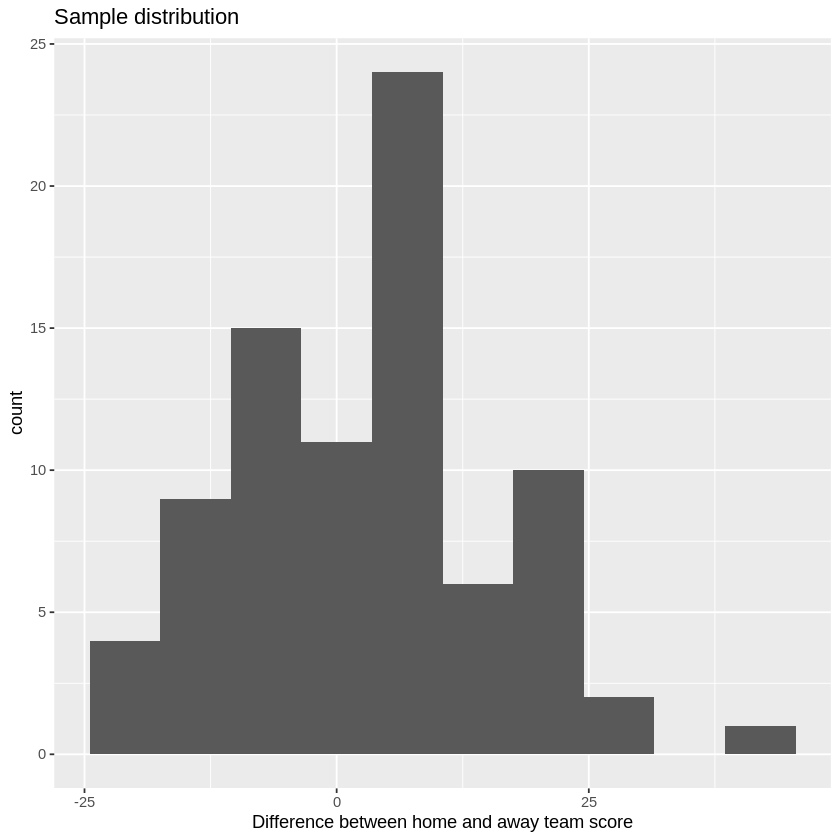

In [5]:
# Plotting the sample 
sample_dist <- sample %>%
    ggplot(aes(x = home_margin)) +
    geom_histogram(binwidth = 7) + 
    xlab("Difference between home and away team score") +
    ggtitle("Sample distribution")

sample_dist

We can see that the sample distribution is unimodal and is roughly bell shaped.

In [6]:
#Calculate mean test statistic for the one sample
sample_mean <- summarize(sample, mean_home_margin = mean(home_margin)) %>%
    pull()
sample_mean

[1] 3.097561

Let's plot that on top of the sample distribution.

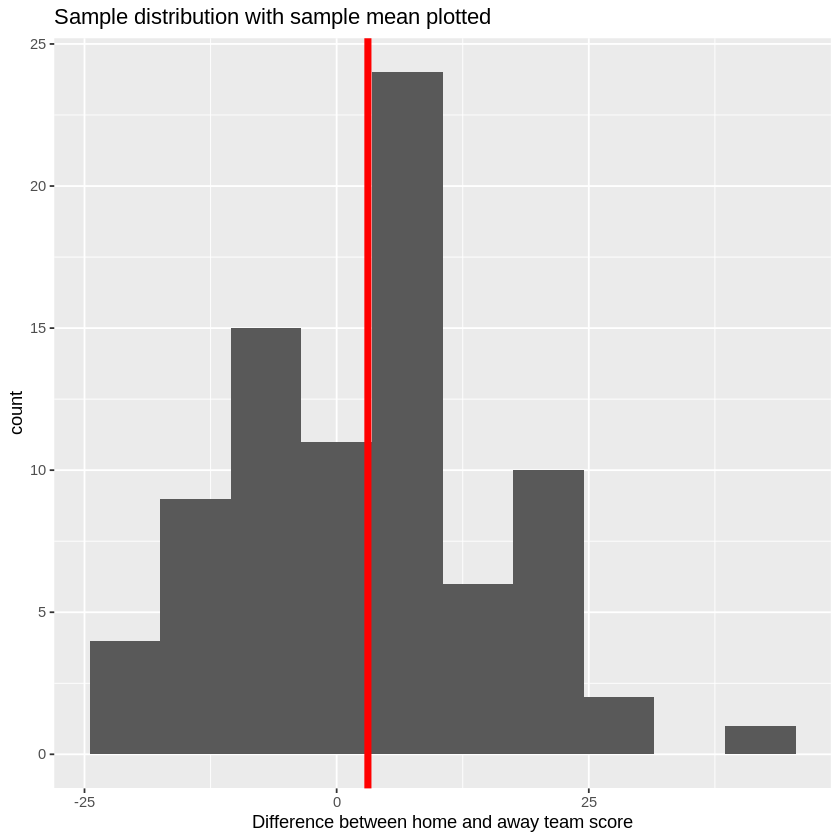

In [11]:
# Plot the sample with mean projected
sample_dist_with_mean <- sample %>%
    ggplot(aes(x = home_margin)) +
    geom_histogram(binwidth = 7) + 
    xlab("Difference between home and away team score") +
    ggtitle("Sample distribution with sample mean plotted") + 
    geom_vline(xintercept = sample_mean, colour="red", linewidth = 2)

sample_dist_with_mean

# Methods: Plan
The first thing we will do is import our data from hoopR. There is a lot of data in hoopR, so we will only choose games from 2009 to 2022. After that we have to calculate home team advantage stat. For this we simply use the mutate function to calculate the difference between the home teams score and the away teams score. Once we have that, we take a random sample of size of 82 games using rep_sample_n, to make a sample of one season. This removes any unwanted influence from certain years, teams, etc.

From here, we are deciding to use a computational approach to hypothesis testing. So our next step is to bootstrap the sample to create a null hypothesis. We will use the infer package for this. Once that has been created, we will calculate a p value based on our sample mean. We will use a significance level of 5% (0.05). This will allow us to decide whether or not to reject the null hypothesis. We will then form our conclusion and answer our initial question.

We expect that the home team will have a significant advantage over the away teams due to the psychological impacts of the fans and the placebo effect of playing at home. 

Some limitations to our test is that it does not account for many other parameters that can determine how well a team is playing such as field goal percentage, defenesive rating, etc. 

# References
Belhumeur, K. (2017, October 3). How important is home-court advantage in the NBA? Bleacher Report. 
    Retrieved March 18, 2023, from https://bleacherreport.com/articles/1520496-how-important-is-home-court-advantage-in-the-nba 
    
Green, J. (2023, February 16). How do the NBA playoffs work? NBA playoffs explained - betway. Betway Insider. 
    Retrieved March 18, 2023, from https://blog.betway.com/basketball/how-do-the-nba-playoffs-work-nba-playoffs-explained/ 
